# <center> **` ZOMATO SALES ANALYSIS `** </center>

### **`1. Importing Required Libraries`**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **`2. Performing Data Cleaning and Removing NULL Values from all the data tables`**

#### **`2.1 Food Table`**

#### **Contains Information about the type of various food items, wheather it's Veg or Non-Veg**

In [2]:
food = pd.read_excel('food.xlsx')
food.head()

,f_id,item,veg_or_non_veg
0,fd0,Aloo Tikki Burger,Veg
1,fd1,Veg Creamy Burger,Veg
2,fd2,Cheese Burst Burger,Veg
3,fd3,Paneer Creamy Burger,Veg
4,fd4,Maxican Burger,Veg


In [3]:
food.shape

(371560, 3)

In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371560 entries, 0 to 371559
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   f_id            371552 non-null  object
 1   item            371552 non-null  object
 2   veg_or_non_veg  371552 non-null  object
dtypes: object(3)
memory usage: 8.5+ MB


In [5]:
food.isna().sum()

f_id              8
item              8
veg_or_non_veg    8
dtype: int64

In [6]:
food[food.isna().any(axis=1)]

,f_id,item,veg_or_non_veg
13540,NaN,NaN,NaN
99966,NaN,NaN,NaN
99988,NaN,NaN,NaN
99989,NaN,NaN,NaN
99991,NaN,NaN,NaN
99993,NaN,NaN,NaN
99994,NaN,NaN,NaN
166711,NaN,NaN,NaN


#### **Removing all Records having NULL Values**

In [7]:
food = food.dropna()
food.isna().sum()

f_id              0
item              0
veg_or_non_veg    0
dtype: int64

In [8]:
food.head()

,f_id,item,veg_or_non_veg
0,fd0,Aloo Tikki Burger,Veg
1,fd1,Veg Creamy Burger,Veg
2,fd2,Cheese Burst Burger,Veg
3,fd3,Paneer Creamy Burger,Veg
4,fd4,Maxican Burger,Veg


In [9]:
food_type = food['veg_or_non_veg'].value_counts().reset_index()
food_type

,veg_or_non_veg,count
0,Veg,270768
1,Non-veg,100784


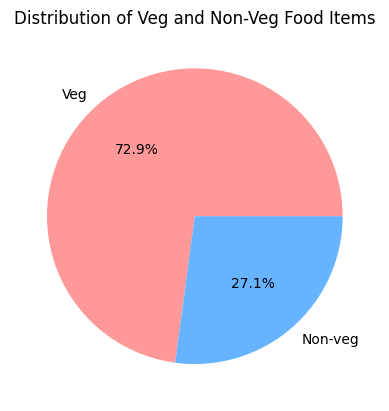

In [10]:
plt.pie(food_type['count'],labels=food_type['veg_or_non_veg'],autopct='%1.1f%%',colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Veg and Non-Veg Food Items')
plt.show()

#### **`2.2 Menu Table`**

In [11]:
menu = pd.read_excel('menu.xlsx')
menu.head()

,menu_id,r_id,f_id,cuisine,price
0,mn0,567335,fd0,"Beverages,Pizzas",40.0
1,mn0,567335,fd669322,"Beverages,Pizzas",40.0
2,mn328,158203,fd0,Beverages,65.0
3,mn328,158203,fd669322,Beverages,65.0
4,mn449,158203,fd0,Beverages,65.0


In [12]:
menu.shape

(1048575, 5)

In [13]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   menu_id  1048575 non-null  object 
 1   r_id     1048575 non-null  int64  
 2   f_id     1048575 non-null  object 
 3   cuisine  1048575 non-null  object 
 4   price    1048574 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 40.0+ MB


In [14]:
menu.isna().sum()

menu_id    0
r_id       0
f_id       0
cuisine    0
price      1
dtype: int64

In [15]:
menu = menu.dropna()
menu.isna().sum()

menu_id    0
r_id       0
f_id       0
cuisine    0
price      0
dtype: int64

#### Changing the data type of r_id {Restaurant id} column

In [16]:
menu['r_id'] = menu['r_id'].astype('str')

In [17]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048574 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   menu_id  1048574 non-null  object 
 1   r_id     1048574 non-null  object 
 2   f_id     1048574 non-null  object 
 3   cuisine  1048574 non-null  object 
 4   price    1048574 non-null  float64
dtypes: float64(1), object(4)
memory usage: 48.0+ MB


In [18]:
menu.head()

,menu_id,r_id,f_id,cuisine,price
0,mn0,567335,fd0,"Beverages,Pizzas",40.0
1,mn0,567335,fd669322,"Beverages,Pizzas",40.0
2,mn328,158203,fd0,Beverages,65.0
3,mn328,158203,fd669322,Beverages,65.0
4,mn449,158203,fd0,Beverages,65.0


In [19]:
print(f'Total No of different Restaurants Registered with Zomato : {menu['r_id'].nunique()}')

Total No of different Restaurants Registered with Zomato : 12117


In [20]:
menu['cuisine'] = menu['cuisine'].str.split(',')

# Explode the list into separate rows
menu = menu.explode('cuisine').reset_index(drop=True)

menu.head()


,menu_id,r_id,f_id,cuisine,price
0,mn0,567335,fd0,Beverages,40.0
1,mn0,567335,fd0,Pizzas,40.0
2,mn0,567335,fd669322,Beverages,40.0
3,mn0,567335,fd669322,Pizzas,40.0
4,mn328,158203,fd0,Beverages,65.0


In [21]:
menu.shape

(1880106, 5)

In [22]:
menu.duplicated().sum()

0

#### **Top 10 Cuisines According to Price**

In [23]:
cuisine_avg_price = menu.groupby('cuisine')['price'].mean().reset_index()

# Sort values by price in descending order to get the top 10
cuisine_avg_price = cuisine_avg_price.sort_values(by='price', ascending=False).head(10)

# Set index for display purposes
cuisine_avg_price.index += 1

# Print the top 10 cuisines with the highest average price
print('Top 10 Cuisines According to Price')
print(cuisine_avg_price)

Top 10 Cuisines According to Price
                       cuisine       price
173  Use Code JUMBO30 to avail  657.968944
97                    Barbecue  406.893886
165                      Sushi  403.384615
105                    Burmese  388.335294
130                   Japanese  342.338144
96                      Bakery  337.334961
143             Middle Eastern  330.377431
141              Mediterranean  308.102941
163                 Steakhouse  294.214286
169                       Thai  291.181222


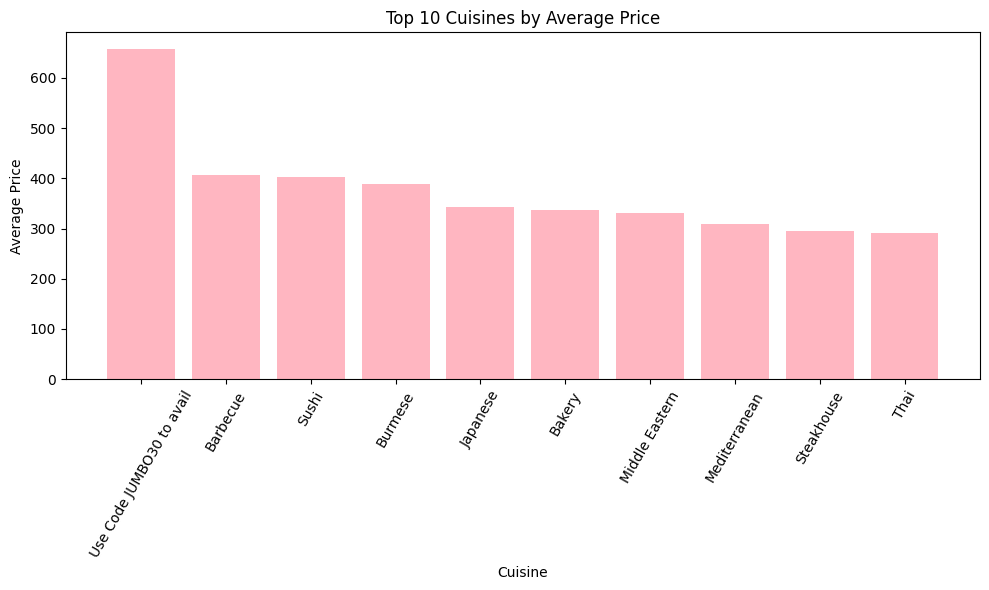

In [24]:
plt.figure(figsize=(10,6))
plt.bar(cuisine_avg_price['cuisine'], cuisine_avg_price['price'], color='lightpink')
plt.title('Top 10 Cuisines by Average Price')
plt.xlabel('Cuisine')
plt.ylabel('Average Price')
plt.xticks(rotation=60)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

#### **`2.3 Orders_Type Table`**

In [25]:
order_type = pd.read_excel('orders_Type.xlsx')
order_type.head()

,Order_Id,Type
0,B496840219,Non-Veg
1,C134461623,Other
2,D679770099,Other
3,E622201871,Veg
4,A980473889,Non-Veg


In [26]:
order_type.shape

(150281, 2)

In [27]:
order_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150281 entries, 0 to 150280
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Order_Id  150281 non-null  object
 1   Type      150281 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [28]:
order_type.isna().sum()

Order_Id    0
Type        0
dtype: int64

In [29]:
ord = order_type['Type'].value_counts().reset_index()
ord

,Type,count
0,Other,50130
1,Veg,50124
2,Non-Veg,50027


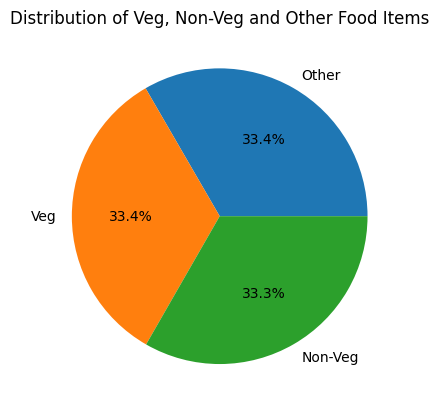

In [30]:
plt.pie(ord['count'],labels=ord['Type'],autopct='%1.1f%%')
plt.title('Distribution of Veg, Non-Veg and Other Food Items')
plt.show()

#### **`2.4 Orders Table`**

In [31]:
orders = pd.read_excel('orders.xlsx')
orders.head()

,order_date,sales_qty,sales_amount,currency,user_id,r_id
0,2017-10-10,100,41241,INR,49226,567335.0
1,2018-05-08,3,-1,INR,77359,531342.0
2,2018-04-06,1,875,INR,5321,158203.0
3,2018-04-11,1,583,INR,21343,187912.0
4,2018-06-18,6,7176,INR,75378,543530.0


In [32]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150281 entries, 0 to 150280
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_date    150281 non-null  datetime64[ns]
 1   sales_qty     150281 non-null  int64         
 2   sales_amount  150281 non-null  int64         
 3   currency      150281 non-null  object        
 4   user_id       150281 non-null  int64         
 5   r_id          148664 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.9+ MB


In [33]:
f'The different Currencies Used : {orders['currency'].nunique()} : {orders['currency'].unique()}'

"The different Currencies Used : 1 : ['INR']"

In [34]:
orders2 = orders.copy()
orders2['order_date'] = pd.to_datetime(orders2['order_date'])
orders2['month_year'] = orders2['order_date'].dt.to_period('M')
orders2.head()

,order_date,sales_qty,sales_amount,currency,user_id,r_id,month_year
0,2017-10-10,100,41241,INR,49226,567335.0,2017-10
1,2018-05-08,3,-1,INR,77359,531342.0,2018-05
2,2018-04-06,1,875,INR,5321,158203.0,2018-04
3,2018-04-11,1,583,INR,21343,187912.0,2018-04
4,2018-06-18,6,7176,INR,75378,543530.0,2018-06


In [35]:
monthwise_sales = orders2.groupby('month_year')['sales_amount'].sum().reset_index()
monthwise_sales['month_year'] = monthwise_sales['month_year'].astype(str)
monthwise_sales.head(10)

,month_year,sales_amount
0,2017-10,26349356
1,2017-11,35385139
2,2017-12,31833907
3,2018-01,42521659
4,2018-02,35258929
5,2018-03,38169872
6,2018-04,35919198
7,2018-05,32273882
8,2018-06,34925537
9,2018-07,36228538


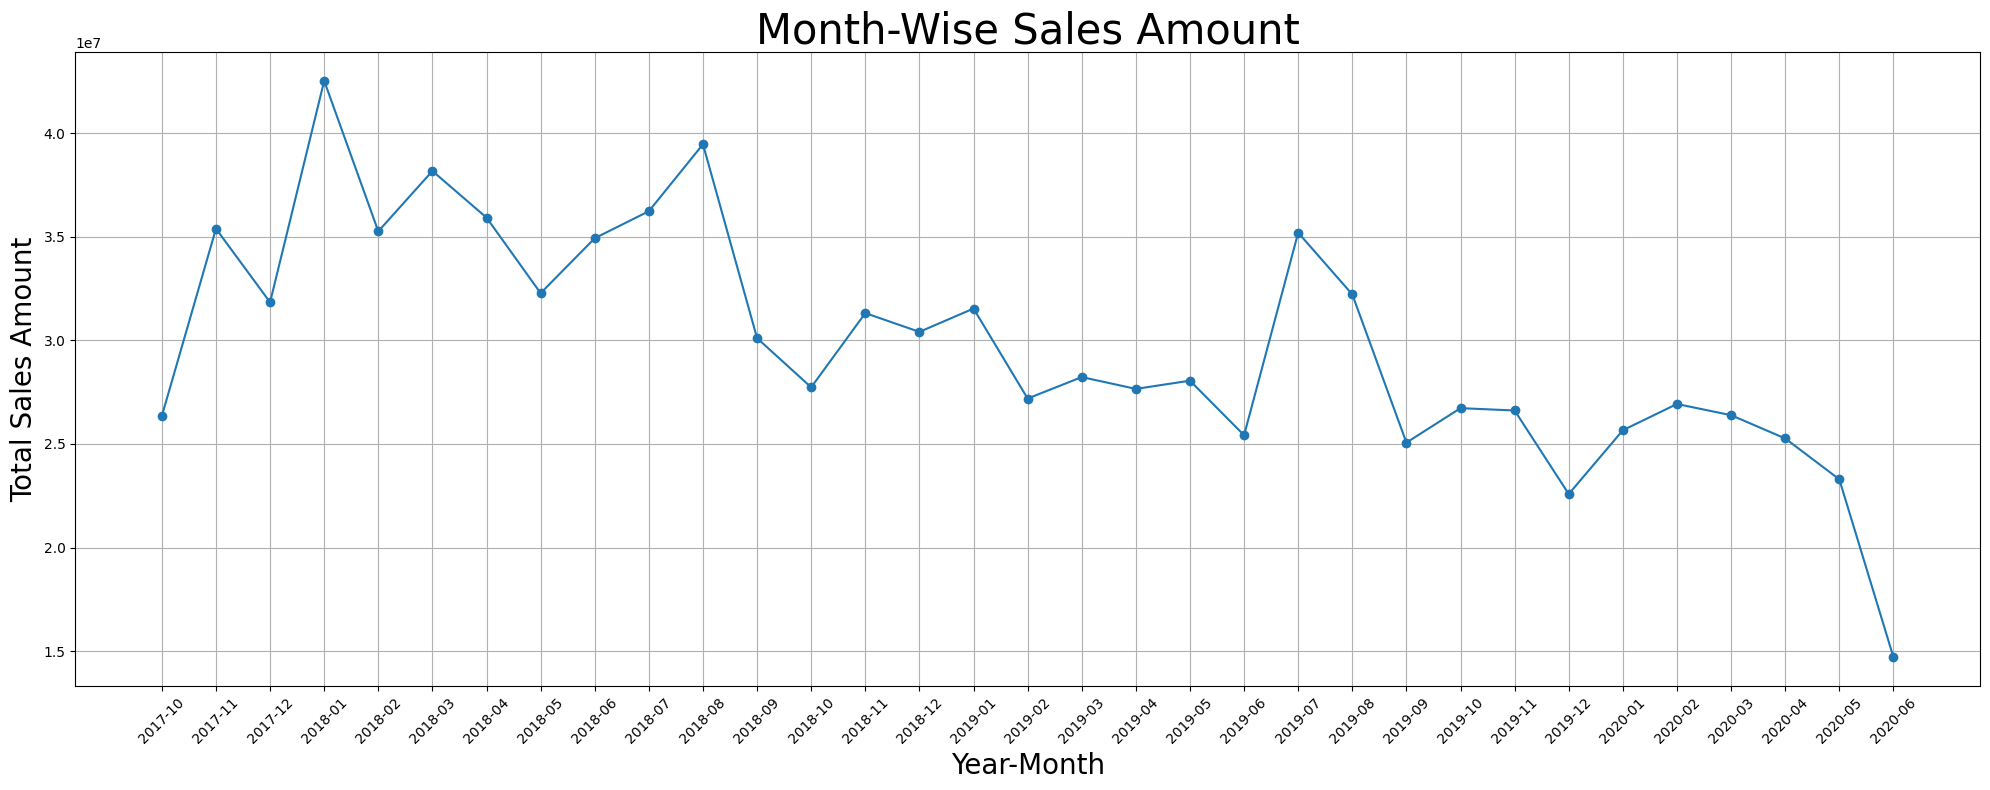

In [36]:
plt.figure(figsize=(20,8))
plt.plot(monthwise_sales['month_year'], monthwise_sales['sales_amount'],marker='o')
plt.title('Month-Wise Sales Amount',fontsize=30)
plt.xlabel('Year-Month',fontsize=20)
plt.ylabel('Total Sales Amount',fontsize=20)
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
monthwise_sales_qty = orders2.groupby('month_year')['sales_qty'].sum().reset_index()
monthwise_sales_qty['month_year'] = monthwise_sales_qty['month_year'].astype(str)
monthwise_sales_qty.head(10)

,month_year,sales_qty
0,2017-10,67179
1,2017-11,90516
2,2017-12,79715
3,2018-01,88574
4,2018-02,88356
5,2018-03,90880
6,2018-04,91723
7,2018-05,92767
8,2018-06,87190
9,2018-07,88581


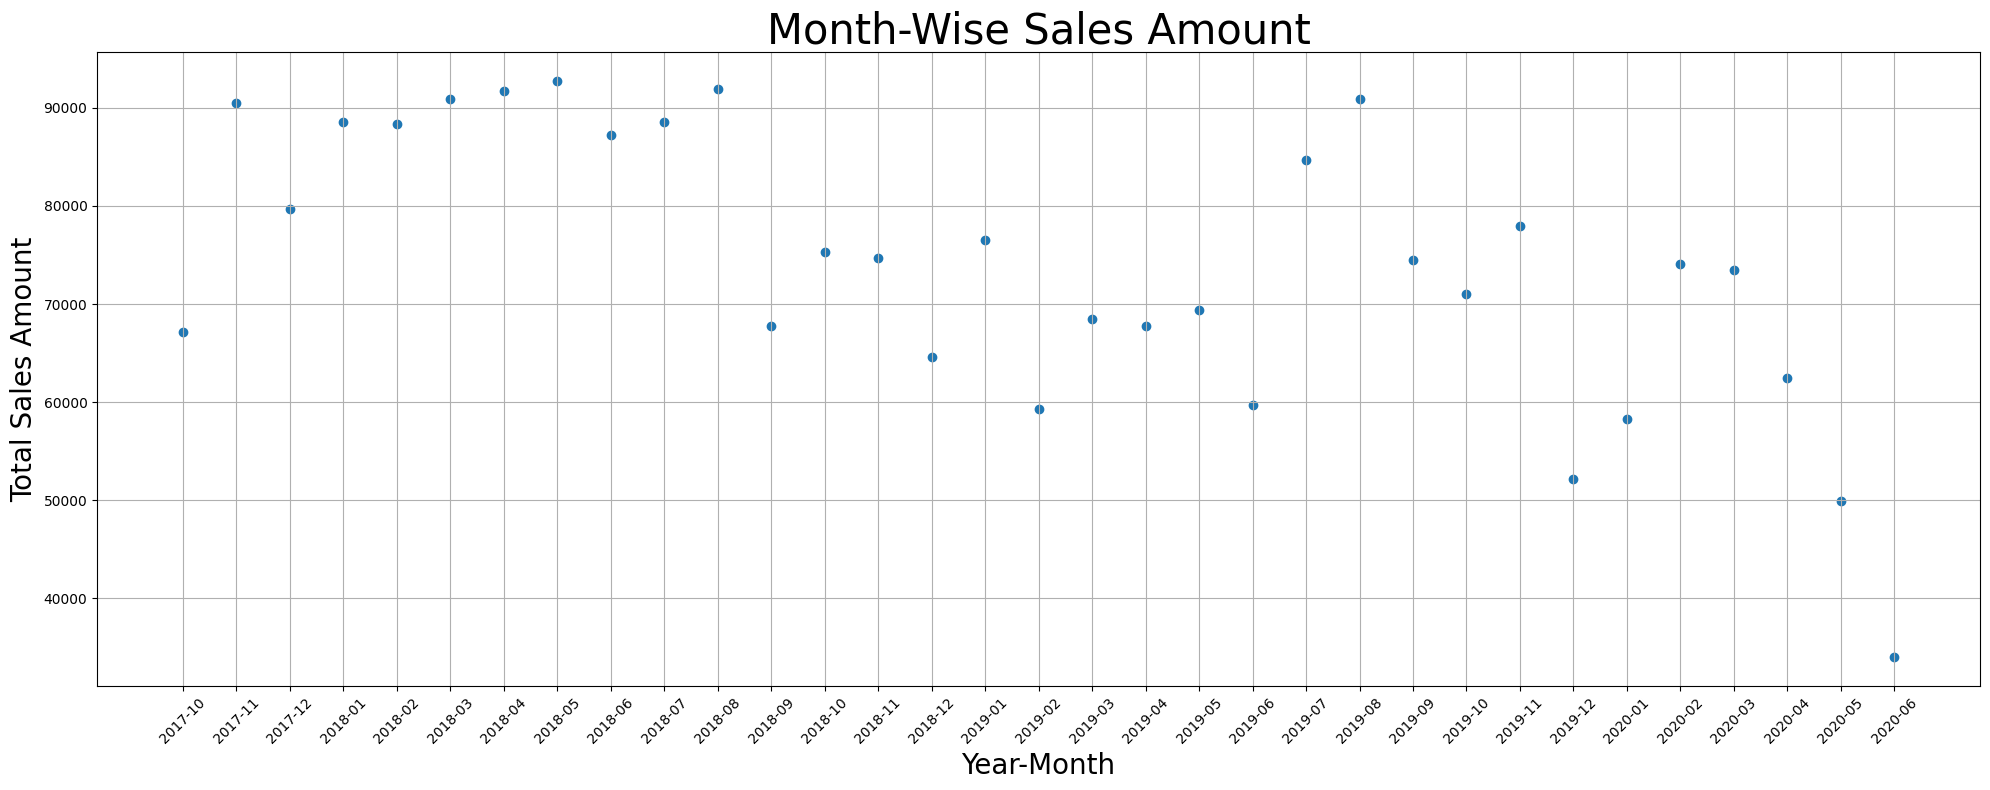

In [38]:
plt.figure(figsize=(20,8))
plt.scatter(monthwise_sales_qty['month_year'], monthwise_sales_qty['sales_qty'])
plt.title('Month-Wise Sales Amount',fontsize=30)
plt.xlabel('Year-Month',fontsize=20)
plt.ylabel('Total Sales Amount',fontsize=20)
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

#### **`2.5 Restaurants Table`**

In [39]:
rest = pd.read_excel('restaurant.xlsx')
rest.head()

,id,name,Country,city,rating,rating_count,cuisine,link,address
0,567335,AB FOODS POINT,India,Abohar,--,Too Few Ratings,"Beverages,Pizzas",https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,531342,Janta Sweet House,India,Abohar,4.4,50+ ratings,"Sweets,Bakery",https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,..."
2,158203,theka coffee desi,India,Abohar,3.8,100+ ratings,Beverages,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city"
3,187912,Singh Hut,India,Abohar,3.7,20+ ratings,"Fast Food,Indian",https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
4,543530,GRILL MASTERS,India,Abohar,--,Too Few Ratings,"Italian-American,Fast Food",https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga..."


In [40]:
rest.shape

(148540, 9)

In [41]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148540 entries, 0 to 148539
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148540 non-null  int64 
 1   name          148454 non-null  object
 2   Country       148540 non-null  object
 3   city          148540 non-null  object
 4   rating        148454 non-null  object
 5   rating_count  148454 non-null  object
 6   cuisine       148441 non-null  object
 7   link          148540 non-null  object
 8   address       148454 non-null  object
dtypes: int64(1), object(8)
memory usage: 10.2+ MB


In [42]:
rest.nunique()

id              148540
name            112817
Country              1
city               821
rating              42
rating_count         8
cuisine           2132
link            148540
address         148400
dtype: int64

In [43]:
rest.isna().sum()

id               0
name            86
Country          0
city             0
rating          86
rating_count    86
cuisine         99
link             0
address         86
dtype: int64

#### **`2.6 Users Table`**

In [44]:
user = pd.read_excel('users.xlsx')
user.head()

,user_id,name,Age,Gender,Marital Status,Occupation
0,1,Claire Ferguson,20,Female,Single,Student
1,2,Jennifer Young,24,Female,Single,Student
2,3,Jermaine Roberson,22,Male,Single,Student
3,4,Rachel Carpenter,22,Female,Single,Student
4,5,Shawn Parker,22,Male,Single,Student


In [45]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         100000 non-null  int64 
 1   name            100000 non-null  object
 2   Age             100000 non-null  int64 
 3   Gender          100000 non-null  object
 4   Marital Status  100000 non-null  object
 5   Occupation      100000 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


In [46]:
user.shape

(100000, 6)

In [47]:
user.nunique()

user_id           100000
name               71251
Age                   16
Gender                 2
Marital Status         3
Occupation             4
dtype: int64

In [48]:
user.isna().sum()

user_id           0
name              0
Age               0
Gender            0
Marital Status    0
Occupation        0
dtype: int64

In [49]:
print(f' Unique Occupations of Customers : {user['Occupation'].unique()}')

 Unique Occupations of Customers : ['Student' 'Employee' 'Self Employeed' 'House wife']


In [50]:
occ = user['Occupation'].value_counts().reset_index()
occ

,Occupation,count
0,Student,53357
1,Employee,30408
2,Self Employeed,13913
3,House wife,2322


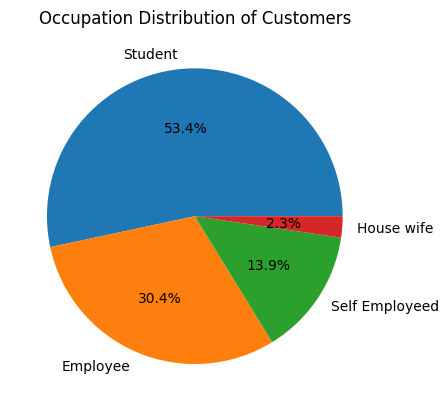

In [51]:
plt.pie(occ['count'], labels=occ['Occupation'], autopct='%1.1f%%')
plt.title('Occupation Distribution of Customers')
plt.show()

### **`Majority Customers are Students and Employees`**